# Finite differences scheme for 2D heat equation

We will solve the 2D heat equation 

$$
    \partial_t u = \nabla^2 u
$$

subject to the boundary condition

$$
    u = 0\quad\forall\quad {\bf x} \in \partial\Omega \wedge \forall t
$$

In [1]:
## Parameters

N = 20; # spatial dimension of the grid
T = 80; # Number of time steps

dt = 1e-5;  # time interval
dx = 1.0/(N-1); # spatial interval


## Create Operator

We will use a simple time-forward scheme so that the opertor becomes:


In [2]:
import numpy as np;

def idx(i,j):
    '''
    Pointer of a 2D index into a 1D array structure
    '''
    return int(i+N*j);

# First define the stencil as a 2D matrix
def operator(N):
    '''
    Create the discrete operator for the 2D heat problem over a square 
    domain with Dirichlet boundary conditions on all sides
    '''
    
    dx = 1.0/(N-1); # spatial interval
    
    D = np.zeros((N*N,N*N));

    for i in range(1,N-1):
        for j in range(1,N-1):
            D[idx(i,j),idx(i,j)] = -4.0/dx**2;
            D[idx(i,j),idx(i-1,j)] = 1.0/dx**2;
            D[idx(i,j),idx(i+1,j)] = 1.0/dx**2;
            D[idx(i,j),idx(i,j-1)] = 1.0/dx**2;
            D[idx(i,j),idx(i,j+1)] = 1.0/dx**2;

    # Define boundary conditions
    for i in range(1,N-1):
        D[idx(0,i),idx(0,i)] = 1.0;
        D[idx(N-1,i),idx(N-1,i)] = 1.0;

    for j in range(1,N-1):
        D[idx(j,0),idx(j,0)] = 1.0;
        D[idx(j,N-1),idx(j,N-1)] = 1.0;
        
    return D

## Set initial condition

We will use a simple initial condition where the temperature is one in the center of the domain and zero otherwise.

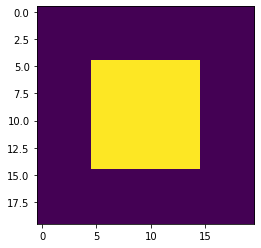

In [3]:
u_0 = np.zeros(N*N);
for i in range(int(N/4),int(3*N/4)):
    for j in range(int(N/4),int(3*N/4)):
        u_0[idx(i,j)] = 1.0

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(np.reshape(u_0,(N,N)))

## Iterate over time steps

In [4]:
snapshots = []

D = operator(N)
u_last = u_0

for t in range(100):
    
    u = u_last+ dt*np.matmul(D,u_last)
    snapshots.append(u)
    u_last = u

## Visualise solution

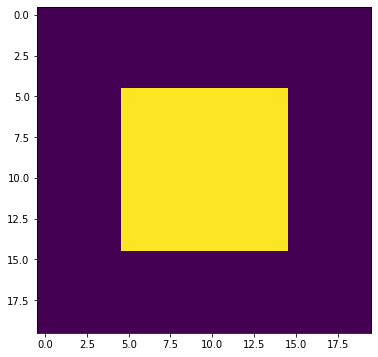

In [5]:
import matplotlib.animation as animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(6,6) );
a = np.reshape(snapshots[0],(N,N));
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1);

def animate_func(i):
    im.set_array(np.reshape(snapshots[i],(N,N)));
    return [im];

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = len(snapshots)
                               );


from IPython.display import HTML
HTML(anim.to_jshtml())

# Stability Analysis

Largest eigenvalue: (1.00001+0j)


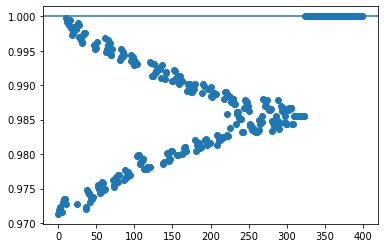

In [6]:
from numpy.linalg import eig

w,v = eig(np.eye(N*N) + dt*D)
print("Largest eigenvalue: {}".format(max(w)))
idx_instabil = np.squeeze(np.where(np.abs(w) > 1.01))
plt.figure()
plt.plot(np.abs(w),'o')
plt.plot(idx_instabil,np.abs(w[idx_instabil]),'or')
plt.axhline(1.0)